# Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 
    
Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [1]:
#importing the libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
#the 1st 5 rows
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
#the last 5 rows
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
# a sample row
df.sample()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
12,60,23,842643,20-11-1997,OH,500/1000,500,1215.36,3000000,432220,...,NO,56520,4710,9420,42390,Saab,95,2000,N,NaN


Data Descriptive Analysis

In [6]:
#shape of the dataset
df.shape

(1000, 40)

In [7]:
#checking the data of the columns
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
#checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
#Checking the description of the numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [10]:
#description of the categorical data

df_cat=df[['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported']]

df_cat.describe().T

,count,unique,top,freq
policy_bind_date,1000,951,01-01-2006,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,02-02-2015,28
incident_type,1000,4,Multi-vehicle Collision,419


In [11]:
#columns of teh dataset
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [12]:
#checking if any null values are there
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [13]:
df.loc[df['collision_type']=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
13,121,34,626808,26-10-2012,OH,100/300,1000,936.61,0,464652,...,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N,NaN
26,257,43,863236,20-09-1990,IN,100/300,2000,1322.10,0,436984,...,YES,9020,1640,820,6560,Toyota,Camry,2005,N,NaN
27,202,34,608513,18-07-2002,IN,100/300,500,848.07,3000000,607730,...,?,5720,1040,520,4160,Suburu,Forrestor,2003,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,163,37,390256,25-11-2009,IN,500/1000,1000,1200.33,4000000,477631,...,YES,3900,390,780,2730,Volkswagen,Jetta,2008,Y,NaN
969,398,55,844062,25-05-1990,OH,250/500,500,862.19,0,606858,...,?,6600,600,1200,4800,Accura,MDX,2012,N,NaN
983,17,39,774895,28-10-2006,IL,250/500,1000,840.95,0,431202,...,?,3440,430,430,2580,Suburu,Legacy,2002,N,NaN
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,YES,6480,540,1080,4860,Honda,Civic,1996,N,NaN


Observation: There are 178 rows missing in collision_type. Since it is an object column we will fill teh values iwth mode.

In [14]:
df.loc[df['property_damage']== '?']
      
  

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
16,70,26,558938,08-06-2005,OH,500/1000,1000,1199.44,5000000,619884,...,YES,52110,5790,5790,40530,Nissan,Maxima,2012,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,NaN
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,YES,6480,540,1080,4860,Honda,Civic,1996,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Observation: There are 360 rows missing in property_damage. Since it is an object column we will fill the '?'values with mode.

In [15]:
df.loc[df['police_report_available'] == '?']   

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN
10,235,42,543610,26-05-2002,OH,100/300,500,1253.12,4000000,462283,...,?,87010,7910,15820,63280,Ford,F150,2002,N,NaN
20,460,62,183430,25-06-2002,IN,250/500,1000,1187.96,4000000,618845,...,?,47160,0,5240,41920,Suburu,Impreza,2011,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,550127,04-07-2007,IN,250/500,1000,1248.05,0,443550,...,?,53280,5920,0,47360,Chevrolet,Malibu,2015,N,NaN
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,NaN
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN


Observation: There are 343 rows missing in police_report_available. Since it is an object column we will fill the '?'values with mode.

In [16]:
from collections import Counter

In [17]:
#Checking the content of each Categorical columns
print("The Value Counts in policy_bind_date - ",Counter(df['policy_bind_date']))
print('The Value Counts in policy_state -', Counter(df['policy_state']))
print('The value Counts in policy_csl- ', Counter(df['policy_csl']))
print('The value Counts in insured_sex- ', Counter(df['insured_sex']))
print('The value Counts in insured_sex- ', Counter(df['insured_sex']))
print('The value Counts in insured_education_level - ', Counter(df['insured_education_level ']))
print('The value Counts in insured_occupation - ', Counter(df['insured_occupation ']))
print('The value Counts in insured_hobbies- ', Counter(df['insured_hobbies']))
print('The value Counts in insured_relationship- ', Counter(df['insured_relationship']))
print('The value Counts in incident_date - ', Counter(df['incident_date']))
print('The value Counts in incident_type- ', Counter(df['incident_type']))
print('The value Counts incollision_type- ', Counter(df['collision_type']))
print('The value Counts in incident_severity- ', Counter(df['incident_severity']))
print('The value Counts in authorities_contacted- ', Counter(df['authorities_contacted']))
print('The value Counts in incident_state- ', Counter(df['incident_state']))
print('The value Counts in incident_city- ', Counter(df['incident_city']))
print('The value Counts in incident_location- ', Counter(df['incident_location']))
print('The value Counts in property_damage- ', Counter(df['property_damage']))
print('The value Counts in police_report_available- ', Counter(df['police_report_available']))
print('The value Counts in auto_make- ', Counter(df['auto_make']))
print('The value Counts in auto_model- ', Counter(df['auto_model']))
print("The value counts in fraud_reported-", Counter(df['fraud_reported']))

The Value Counts in policy_bind_date -  Counter({'01-01-2006': 3, '05-08-1992': 3, '28-04-1992': 3, '25-05-1990': 2, '04-06-2000': 2, '20-09-1990': 2, '09-03-2003': 2, '11-11-1998': 2, '28-12-2002': 2, '14-04-1992': 2, '15-05-1997': 2, '07-12-1999': 2, '28-12-1991': 2, '04-05-2000': 2, '29-09-1999': 2, '27-07-2014': 2, '08-11-2009': 2, '21-09-1996': 2, '14-07-1997': 2, '07-07-1996': 2, '05-07-2014': 2, '28-01-2010': 2, '21-12-2002': 2, '07-12-1995': 2, '11-03-2010': 2, '19-09-1995': 2, '03-02-1997': 2, '09-07-2002': 2, '25-09-2001': 2, '16-07-2002': 2, '22-08-1991': 2, '21-09-2005': 2, '07-04-1999': 2, '06-05-2007': 2, '14-12-1991': 2, '16-05-2008': 2, '03-01-2004': 2, '25-12-2013': 2, '07-11-1997': 2, '09-08-2004': 2, '20-07-1991': 2, '30-08-1993': 2, '29-01-1998': 2, '05-01-1992': 2, '15-11-1997': 2, '24-06-1990': 2, '17-10-2014': 1, '27-06-2006': 1, '06-09-2000': 1, '06-06-2014': 1, '12-10-2006': 1, '03-02-1990': 1, '05-02-1997': 1, '25-07-2011': 1, '26-05-2002': 1, '29-05-1999': 1,

KeyError: 'insured_education_level '

In [ ]:
#Checking the content of each Categorical columns
df['policy_bind_date'].value_counts()

In [18]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [19]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [20]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [21]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [22]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [23]:
df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [24]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [25]:
df['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

In [26]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [27]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [28]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [29]:
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [30]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [31]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [32]:
df['incident_location'].value_counts()

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

In [33]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [34]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [35]:
df['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [36]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [37]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Observation:
    
    1000 rows and 40 columns
    39 features and 1 Target
    
    policy_bind_date:

        It is made up of Categorical data
        It has 951 Unique data
        It has no null values
        Its Datatype is an Object type
      
    policy_state:
        It is made up of Categorical data
        It has 3 Unique data- Ohio(OH), Illinois(IL) and Indiana (IN)
        It has no null values
        Its Datatype is an Object type
        
    policy_csl:
        It is made up of Categorical data
        It has 3 Unique data- 250/500,100/300 and 500/1000
        It has no null values
        Its Datatype is an Object type 
   
    insured_sex :  
        It is made up of Categorical data
        It has 3 Unique data- Female & Male
        It has no null values
        Its Datatype is an Object type 
        
    insured_education_level:    
        It is made up of Categorical data
        It has 8 Unique data- JD, High School,Associate,MD,Masters,PhD,College 
        It has no null values
        Its Datatype is an Object type 
        
    insured_occupation:   
        It is made up of Categorical data
        It has 14 Unique data- machine-op-inspct, prof-specialty etc
        It has no null values
        Its Datatype is an Object type 
        
    insured_hobbies:   
        It is made up of Categorical data
        It has 20 Unique data- reading,exercise etc
        It has no null values
        Its Datatype is an Object type 
        
    insured_relationship:
        It is made up of Categorical data
        It has 6 Unique data- own-child,other relative etc
        It has no null values
        Its Datatype is an Object type 
        
    incident_date:
        It is made up of Categorical data
        It has no null values
        Its Datatype is an Object type 
        
    incident_type:
        It is made up of Categorical data
        It has 4 Unique data- own-Multi-vehicle Collision, Single Vehicle Collision,Vehicle Theft   and Parked Car 
        It has no null values
        Its Datatype is an Object type 
    
    collision_type
        It is made up of Categorical data
        It has 3 Unique data- Rear Collision,Side Collision & Front Collision
        It has 178 null values
        Its Datatype is an Object type 
        
    incident_severity:
        It is made up of Categorical data
        It has 4 Unique data- Minor Damage, Total Loss, Major Damage and Trivial Damage
        It has no null values
        Its Datatype is an Object type 
        
    authorities_contacted:
        It is made up of Categorical data
        It has 4 Unique data- Police,Fire,Other,Ambulance and None
        It has no null values
        Its Datatype is an Object type 
        
    incident_state:
        It is made up of Categorical data
        It has 7 Unique data- NY,SC,WV,VA,NC,PA,OH 
        It has no null values
        Its Datatype is an Object type 
   

    incident_city:
        It is made up of Categorical data
        It has 7 Unique data-Springfield, Arlington, Columbus, Northbend, Hillsdale, Riverwood,Northbrook 
        It has no null values
        Its Datatype is an Object type 

    incident_location:
        It is made up of Categorical data
        It has no null values
        Its Datatype is an Object type 

    property_damage:
        It is made up of Categorical data
        It has 2 Unique data- yes & No
        It has 360 null values
        Its Datatype is an Object type 


    police_report_available:
        It is made up of Categorical data
        It has 2 Unique data- yes & No
        It has 343 null values
        Its Datatype is an Object type 

    auto_make:
        It is made up of Categorical data
        It has 14 Unique data- Saab, Dodge etc
        It has no null values
        Its Datatype is an Object type 

    auto_model:
        It is made up of Categorical data
        It has no null values
        Its Datatype is an Object type 
 
    fraud_reported (target):
        It is made up of Categorical data
        It has 2 Unique data- Yes & No
        It has no null values
        Its Datatype is an Object type 

EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION

The objectives of the EDA is to ensure;

    Independent Features will have a normal distribution using Data Transformation to remove skewness
    Datasets will have the same scale using Normalization and Standardization
    Column mean will be zero
    Standard Deviation of the data should be 1

Count Distribution of Categorical Data - Univariate Analysis

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64

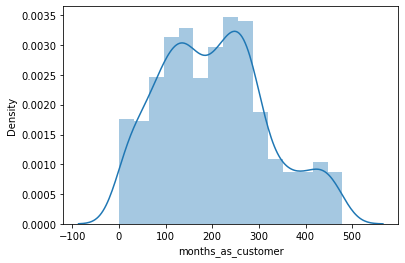

In [39]:
sns.distplot(df['months_as_customer'],kde=True)
df['months_as_customer'].value_counts()

<AxesSubplot:xlabel='age', ylabel='Density'>

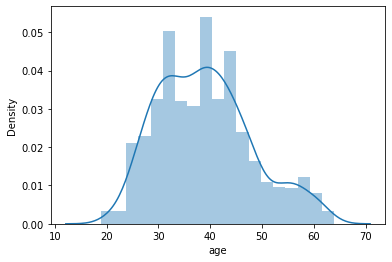

In [40]:
sns.distplot(df['age'],kde=True)

521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64

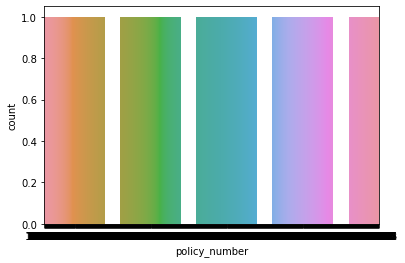

In [41]:
sns.countplot(x='policy_number',data=df)
df['policy_number'].value_counts()

<AxesSubplot:xlabel='policy_bind_date', ylabel='count'>

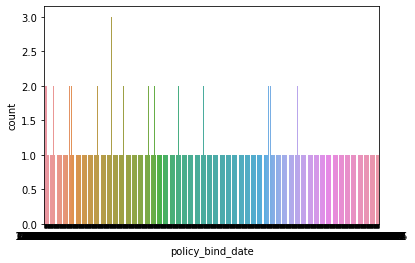

In [42]:
sns.countplot(x= 'policy_bind_date', data =df)

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

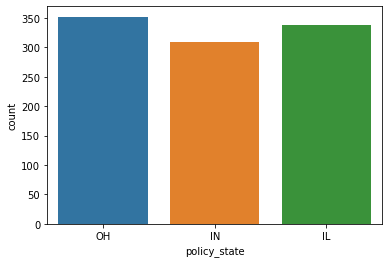

In [43]:
sns.countplot(x= 'policy_state', data =df)
df['policy_state'].value_counts()

Observation: Policy has been issued more from Ohio(OH), followed by Illionis(IL) and Indiana(IN)

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

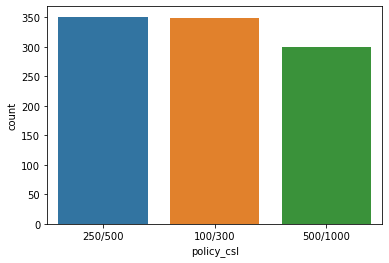

In [44]:
sns.countplot(x= 'policy_csl', data =df)
df['policy_csl'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

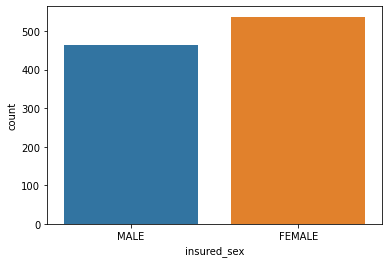

In [45]:
sns.countplot(x= 'insured_sex', data =df)
df['insured_sex'].value_counts()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MD'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'College'),
  Text(6, 0, 'JD')])

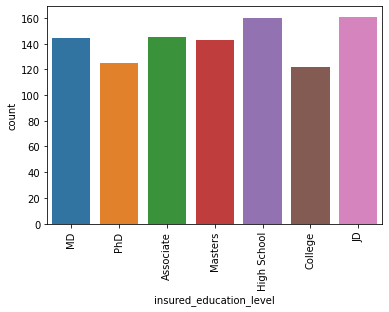

In [46]:
sns.countplot(x= 'insured_education_level', data =df)
df['insured_education_level'].value_counts()
plt.xticks(rotation=90)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

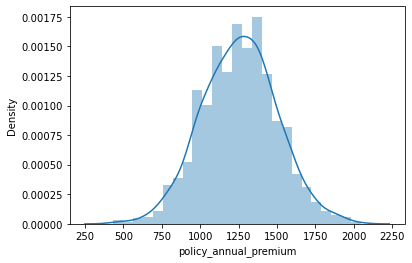

In [47]:
sns.distplot(df['policy_annual_premium'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

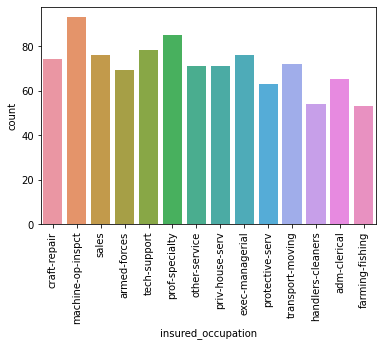

In [48]:
sns.countplot(x= 'insured_occupation', data =df)
df['insured_occupation'].value_counts()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

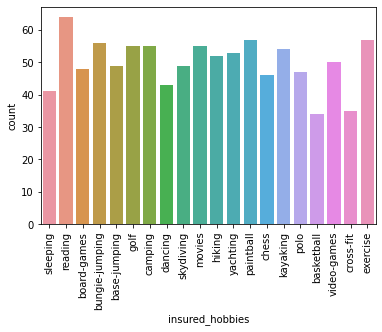

In [49]:
sns.countplot(x= 'insured_hobbies', data =df)
df['insured_hobbies'].value_counts()
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

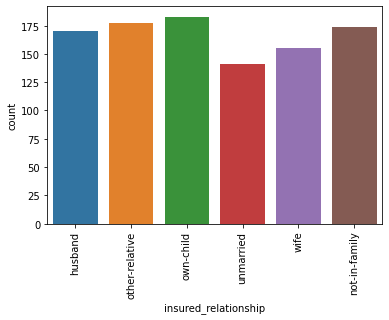

In [50]:
sns.countplot(x= 'insured_relationship', data =df)
df['insured_relationship'].value_counts()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, '25-01-2015'),
  Text(1, 0, '21-01-2015'),
  Text(2, 0, '22-02-2015'),
  Text(3, 0, '10-01-2015'),
  Text(4, 0, '17-02-2015'),
  Text(5, 0, '02-01-2015'),
  Text(6, 0, '13-01-2015'),
  Text(7, 0, '27-02-2015'),
  Text(8, 0, '30-01-2015'),
  Text(9, 0, '05-01-2015'),
  Text(10, 0, '06-01-2015'),
  Text(11, 0, '15-02-2015'),
  Text(12, 0, '22-01-2015'),
  Text(13, 0, '08-01-2015'),
  Text(14, 0, '15-01-2015'),
  Text(15, 0, '29-01-2015'),
  Text(16, 0, '19-01-2015'),
  Text(17, 0, '01-01-2015'),
  Text(18, 0, '10-02-2015'),
  Text(19, 0, '11-01-2015'),
  Text(20, 0, '24-02-2015'),
  Text(21, 0, '09-01-2015'),
  Text(22, 0, '28-01-2015'),
  Text(23, 0, '07-01-2015'),
  Text(24, 0, '18-01-2015'),
  Text(25, 

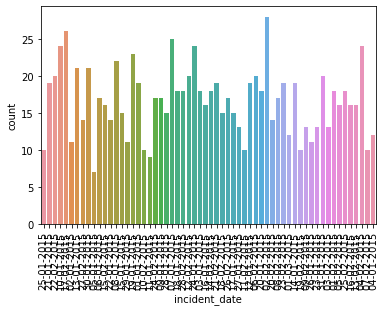

In [51]:
sns.countplot(x= 'incident_date', data =df)
df['incident_date'].value_counts()
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

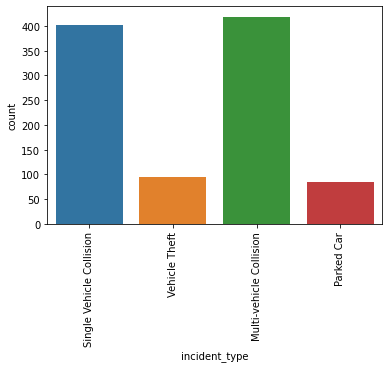

In [52]:
sns.countplot(x= 'incident_type', data =df)
df['incident_type'].value_counts()
plt.xticks(rotation=90)

Observation: Most of the incidents were Multi-vehicle Collision followed by Single Vehicle Collision

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Side Collision'),
  Text(1, 0, '?'),
  Text(2, 0, 'Rear Collision'),
  Text(3, 0, 'Front Collision')])

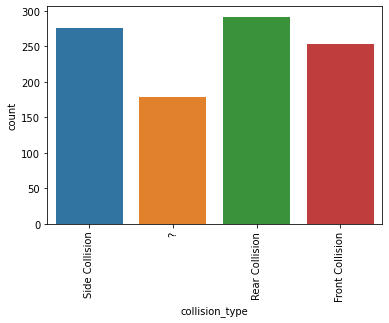

In [53]:
sns.countplot(x= 'collision_type', data =df)
df['collision_type'].value_counts()
plt.xticks(rotation=90)

Observation: Most of the collision types were Rear Collision followed by Side Collision.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Major Damage'),
  Text(1, 0, 'Minor Damage'),
  Text(2, 0, 'Total Loss'),
  Text(3, 0, 'Trivial Damage')])

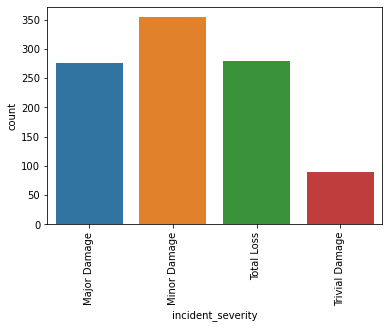

In [54]:
sns.countplot(x= 'incident_severity', data =df)
df['incident_severity'].value_counts()
plt.xticks(rotation=90)

Observation: Most of the incident_severity types were Minor Damage followed by Major Damage & Total Loss.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Police'),
  Text(1, 0, 'None'),
  Text(2, 0, 'Fire'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Ambulance')])

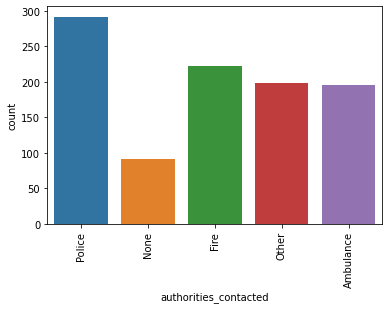

In [55]:
sns.countplot(x= 'authorities_contacted', data =df)
df['authorities_contacted'].value_counts()
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'SC'),
  Text(1, 0, 'VA'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'OH'),
  Text(4, 0, 'WV'),
  Text(5, 0, 'NC'),
  Text(6, 0, 'PA')])

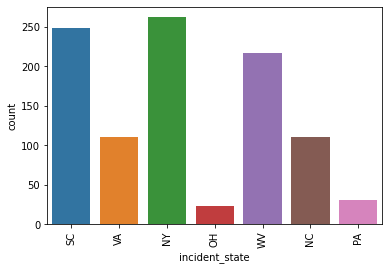

In [56]:
sns.countplot(x= 'incident_state', data =df)
df['incident_state'].value_counts()
plt.xticks(rotation=90)

Observation: Most of the incident_state is NY & SC followed by VW.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Columbus'),
  Text(1, 0, 'Riverwood'),
  Text(2, 0, 'Arlington'),
  Text(3, 0, 'Springfield'),
  Text(4, 0, 'Hillsdale'),
  Text(5, 0, 'Northbend'),
  Text(6, 0, 'Northbrook')])

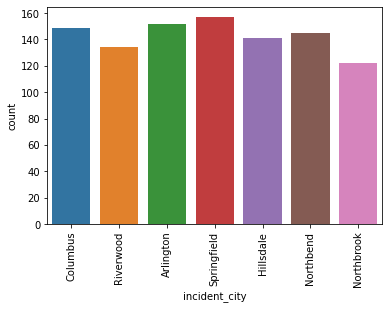

In [57]:
sns.countplot(x= 'incident_city', data =df)
df['incident_city'].value_counts()
plt.xticks(rotation=90)

Observation: Most of the incident_city was Springfield & Arlington followed by Columbus.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

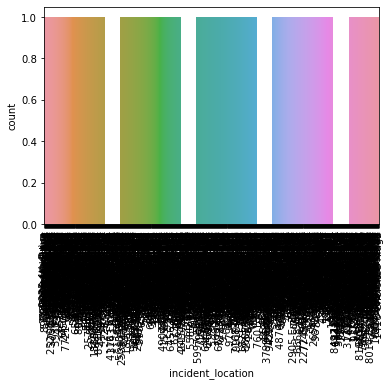

In [58]:
sns.countplot(x= 'incident_location', data =df)
df['incident_location'].value_counts()
plt.xticks(rotation=90)

(array([0, 1, 2]), [Text(0, 0, 'YES'), Text(1, 0, '?'), Text(2, 0, 'NO')])

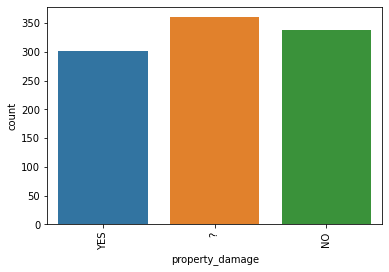

In [59]:
sns.countplot(x= 'property_damage', data =df)
df['property_damage'].value_counts()
plt.xticks(rotation=90)

(array([0, 1, 2]), [Text(0, 0, 'YES'), Text(1, 0, '?'), Text(2, 0, 'NO')])

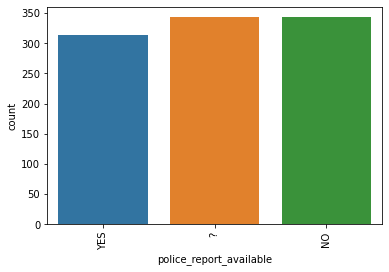

In [60]:
sns.countplot(x= 'police_report_available', data =df)
df['police_report_available'].value_counts()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

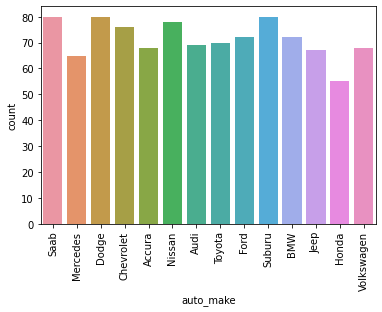

In [61]:
sns.countplot(x= 'auto_make', data =df)
df['auto_make'].value_counts()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

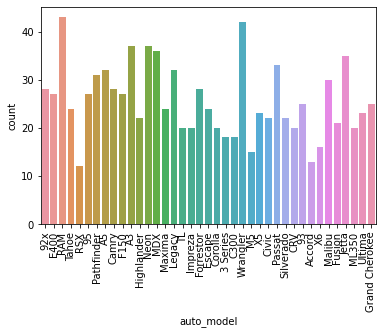

In [62]:
sns.countplot(x= 'auto_model', data =df)
df['auto_model'].value_counts()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

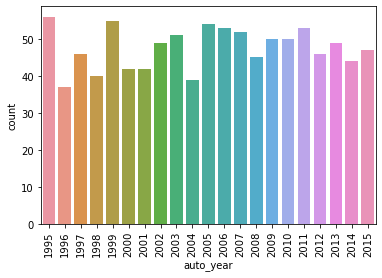

In [63]:
sns.countplot(x= 'auto_year', data =df)
df['auto_year'].value_counts()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

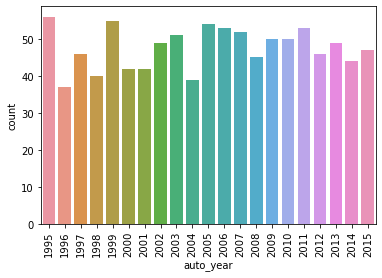

In [64]:
sns.countplot(x= 'auto_year', data =df)
df['auto_year'].value_counts()
plt.xticks(rotation=90)

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

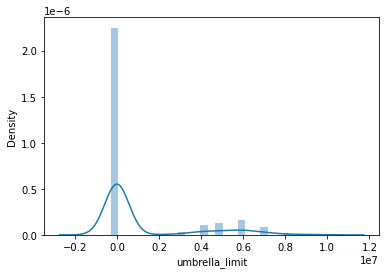

In [65]:
sns.distplot(df['umbrella_limit'],kde=True)

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

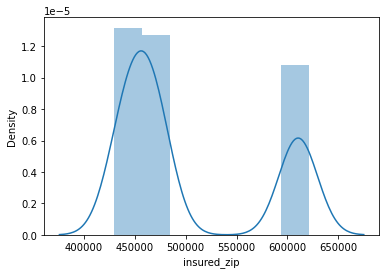

In [66]:
sns.distplot(df['insured_zip'],kde=True)

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

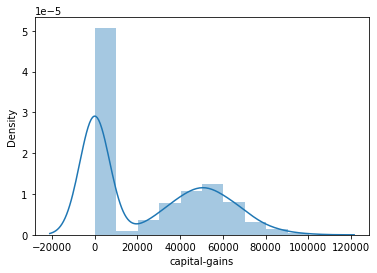

In [67]:
sns.distplot(df['capital-gains'],kde=True)

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

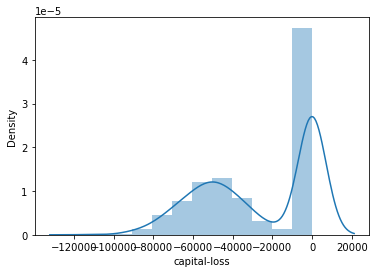

In [68]:
sns.distplot(df['capital-loss'],kde=True)

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

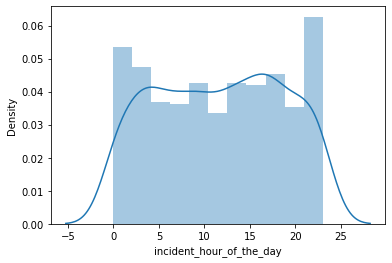

In [69]:
sns.distplot(df['incident_hour_of_the_day'],kde=True)

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

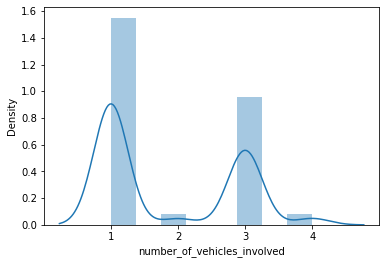

In [70]:
sns.distplot(df['number_of_vehicles_involved'],kde=True)

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

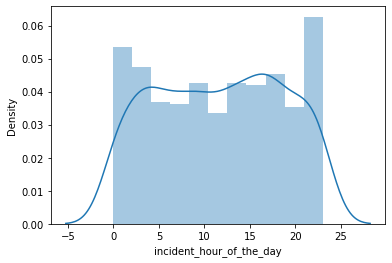

In [71]:
sns.distplot(df['incident_hour_of_the_day'],kde=True)

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

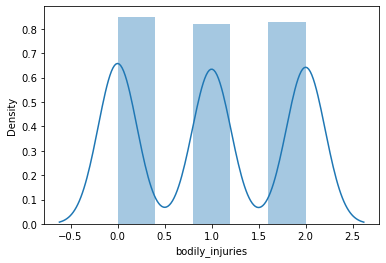

In [72]:
sns.distplot(df['bodily_injuries'],kde=True)

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

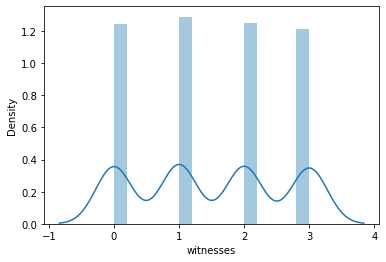

In [73]:
sns.distplot(df['witnesses'],kde=True)

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

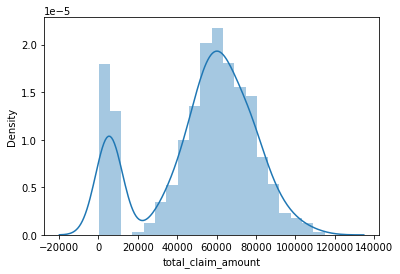

In [74]:
sns.distplot(df['total_claim_amount'],kde=True)

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

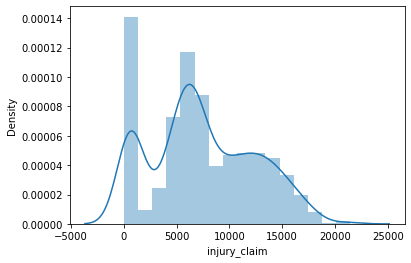

In [75]:
sns.distplot(df['injury_claim'],kde=True)

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

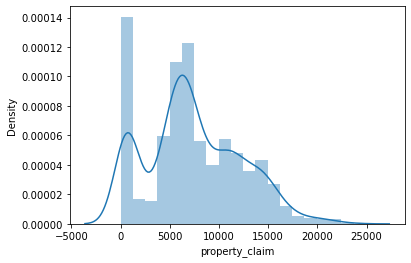

In [76]:
sns.distplot(df['property_claim'],kde=True)

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

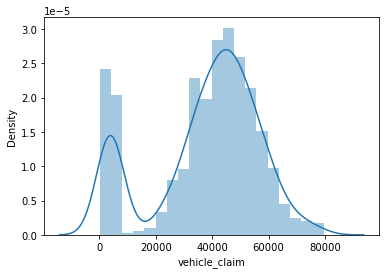

In [77]:
sns.distplot(df['vehicle_claim'],kde=True)

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

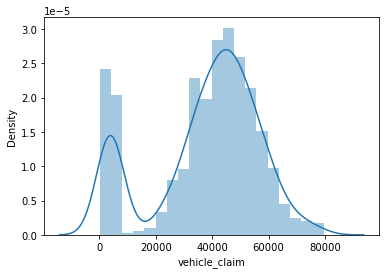

In [78]:
sns.distplot(df['vehicle_claim'],kde=True)

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

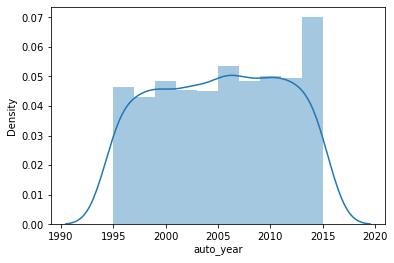

In [79]:
sns.distplot(df['auto_year'],kde=True)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

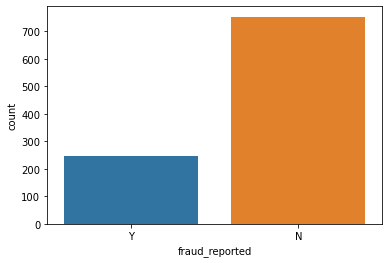

In [80]:
sns.countplot(df['fraud_reported'])

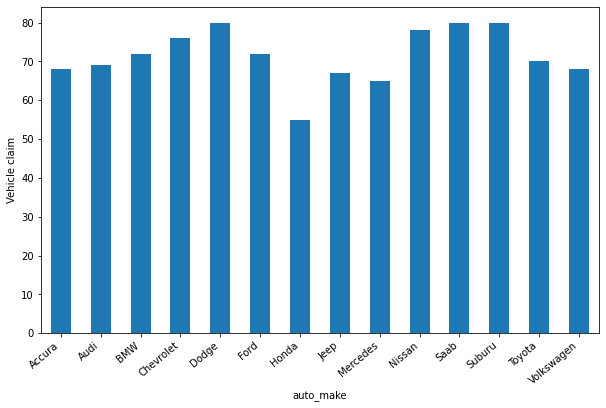

In [81]:

plt.figure(figsize=(10,6))
ax=df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

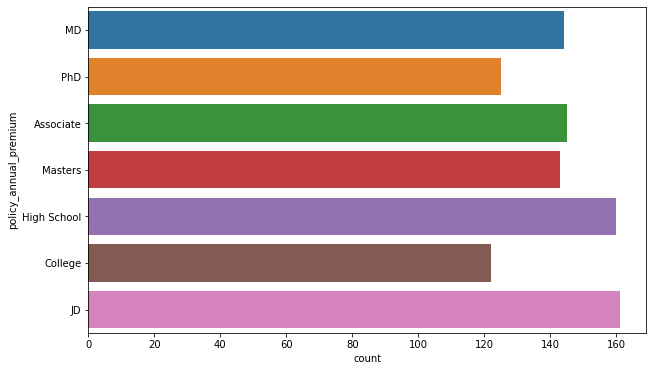

In [82]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

Updating Null values

In [83]:
df['collision_type'].replace(to_replace='?', value='Nan',inplace =True)
df['property_damage'].replace(to_replace='?', value='Nan',inplace =True)
df['police_report_available'].replace(to_replace='?', value='Nan',inplace =True) 

In [84]:
df['collision_type']

0       Side Collision
1                  Nan
2       Rear Collision
3      Front Collision
4                  Nan
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999                Nan
Name: collision_type, Length: 1000, dtype: object

In [85]:
df['property_damage']

0      YES
1      Nan
2       NO
3      Nan
4       NO
      ... 
995    YES
996    YES
997    Nan
998    Nan
999    Nan
Name: property_damage, Length: 1000, dtype: object

In [86]:
df['police_report_available']

0      YES
1      Nan
2       NO
3       NO
4       NO
      ... 
995    Nan
996    Nan
997    YES
998    YES
999    Nan
Name: police_report_available, Length: 1000, dtype: object

In [87]:
df['collision_type'].mode()

0    Rear Collision
dtype: object

In [88]:
df['collision_type'].replace(to_replace='Nan', value='Rear Collision',inplace =True)

#here as Nan value is the maximum we will convert it into yes under the assumption that because there was a damage to property else insurance would not have been claimed.

In [89]:
df['property_damage'].mode()

0    Nan
dtype: object

In [90]:
df['property_damage'].replace(to_replace='Nan', value='YES',inplace =True)

In [91]:
df['property_damage'].value_counts()

YES    662
NO     338
Name: property_damage, dtype: int64

In [92]:
df['police_report_available'].value_counts()

Nan    343
NO     343
YES    314
Name: police_report_available, dtype: int64

#we will go by the assumption that for claim a police report is required hence we will convert the nan values to yes.

In [93]:
df['police_report_available'].replace(to_replace='Nan', value='YES',inplace =True)

In [94]:
df['police_report_available'].value_counts()

YES    657
NO     343
Name: police_report_available, dtype: int64

In [95]:
#_c39 column is only nul values. So we will delete this column
 
df= df.drop(columns= ['_c39'])


In [96]:
df.head(1)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y


Observations on Null Update
From the above we can see that all null values have been updated.

Encoding

We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data
Here we shall adopt Ordinal Encoder to transform the all Non-numerical column into Numerical Data. For label column we will use label encoder

In [97]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [98]:
le=LabelEncoder()
oe=OrdinalEncoder()

In [99]:
df['policy_state']=oe.fit_transform(df['policy_state'].values.reshape(-1,1))
df['policy_csl']=oe.fit_transform(df['policy_csl'].values.reshape(-1,1))
df['insured_sex']=oe.fit_transform(df['insured_sex'].values.reshape(-1,1))
df['insured_education_level']=oe.fit_transform(df['insured_education_level'].values.reshape(-1,1))
df['insured_occupation']=oe.fit_transform(df['insured_occupation'].values.reshape(-1,1))
df['insured_hobbies']=oe.fit_transform(df['insured_hobbies'].values.reshape(-1,1))
df['insured_relationship']=oe.fit_transform(df['insured_relationship'].values.reshape(-1,1))
df['incident_date']=oe.fit_transform(df['incident_date'].values.reshape(-1,1))
df['incident_type']=oe.fit_transform(df['incident_type'].values.reshape(-1,1))
df['collision_type']=oe.fit_transform(df['collision_type'].values.reshape(-1,1))
df['incident_severity']=oe.fit_transform(df['incident_severity'].values.reshape(-1,1))
df['authorities_contacted']=oe.fit_transform(df['authorities_contacted'].values.reshape(-1,1))
df['incident_state']=oe.fit_transform(df['incident_state'].values.reshape(-1,1))
df['incident_city']=oe.fit_transform(df['incident_city'].values.reshape(-1,1))
df['incident_location']=oe.fit_transform(df['incident_location'].values.reshape(-1,1))
df['property_damage']=oe.fit_transform(df['property_damage'].values.reshape(-1,1))
df['police_report_available']=oe.fit_transform(df['police_report_available'].values.reshape(-1,1))
df['auto_make']=oe.fit_transform(df['auto_make'].values.reshape(-1,1))
df['auto_model']=oe.fit_transform(df['auto_model'].values.reshape(-1,1))
df['fraud_reported']=le.fit_transform(df['fraud_reported'].values.reshape(-1,1))


In [100]:
df.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,2.0,1.0,1000,1406.91,0,466132,...,2,1.0,71610,6510,13020,52080,10.0,1.0,2004,1
1,228,42,342868,27-06-2006,1.0,1.0,2000,1197.22,5000000,468176,...,0,1.0,5070,780,780,3510,8.0,12.0,2007,1
2,134,29,687698,06-09-2000,2.0,0.0,2000,1413.14,5000000,430632,...,3,0.0,34650,7700,3850,23100,4.0,30.0,2007,0


In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_state,1000.0,1.014000e+00,8.309600e-01,0.00,0.0000,1.0,2.000,2.00
policy_csl,1000.0,9.510000e-01,8.045162e-01,0.00,0.0000,1.0,2.000,2.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
insured_sex,1000.0,4.630000e-01,4.988786e-01,0.00,0.0000,0.0,1.000,1.00


In [102]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_date                  float64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_location              float64
incident_hour_of_the_day 

All the categorical data have been converted into Numerical data.

In [105]:
sns.pairplot(df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000015D252AB4C0> (for post_execute):


KeyboardInterrupt: 

Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis

Collinearity Between Feature and Label

    Multicolinearity between features
    Lets visualize the correlation between (Features vs Label) and (Features vs Features)

In [106]:
#checking for general correlation
df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.058383,-0.073415,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.052359,-0.064987,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,-0.012661,0.006350,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.022960,0.012180,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,0.071500,-0.007354,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.066639,0.022899,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.002332,0.019766,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.006738,0.007929,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,0.019805,0.049287,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.042463,-0.021930,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873


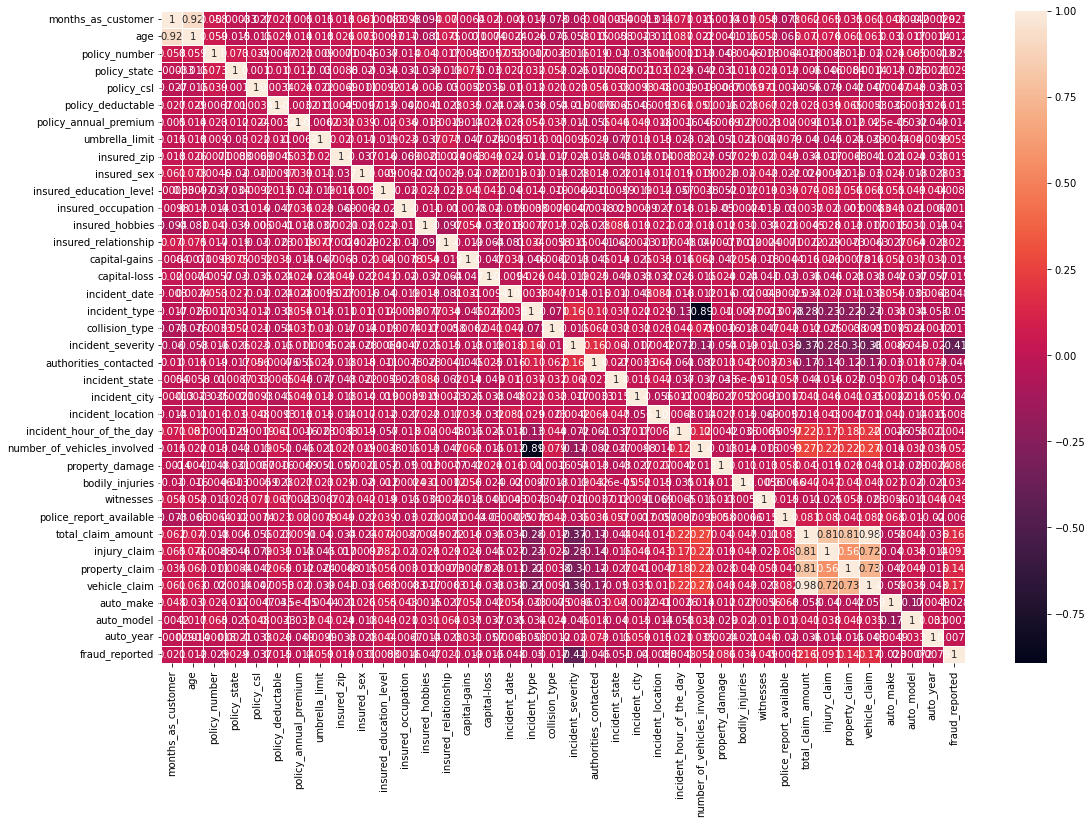

In [118]:

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [107]:
#checking for correlation between each feature and Label
df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
policy_number                 -0.029443
auto_make                     -0.027519
capital-gains                 -0.019173
collision_type                -0.017315
capital-loss                  -0.014863
policy_annual_premium         -0.014480
incident_location             -0.008832
police_report_available       -0.006247
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
insured_zip                    0.019368
months_as_customer             0.020544


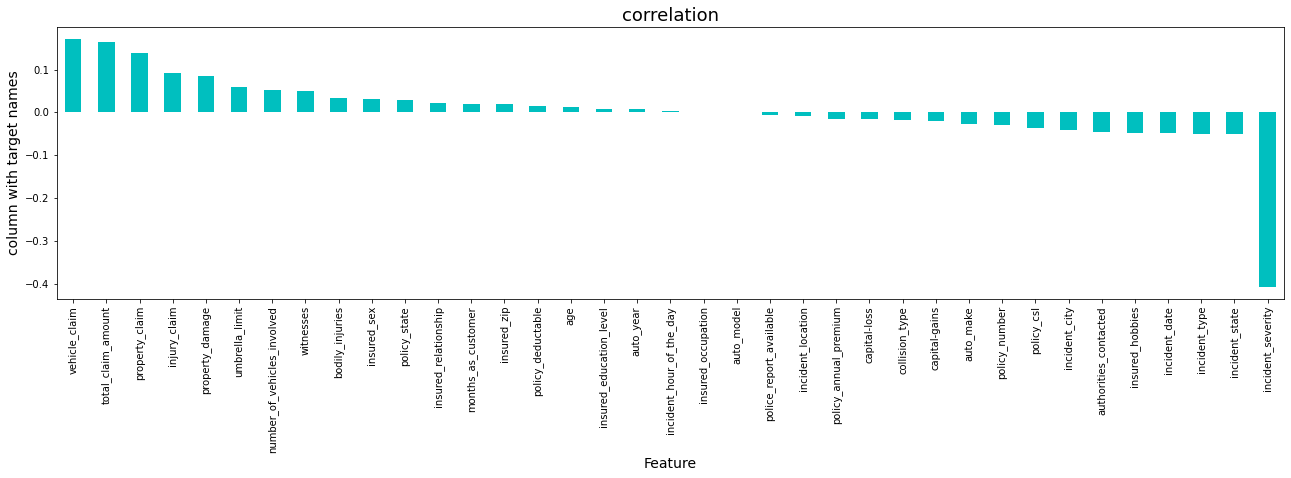

In [109]:
plt.figure(figsize=(22,5))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar', color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Multicollinearity Check

<AxesSubplot:>

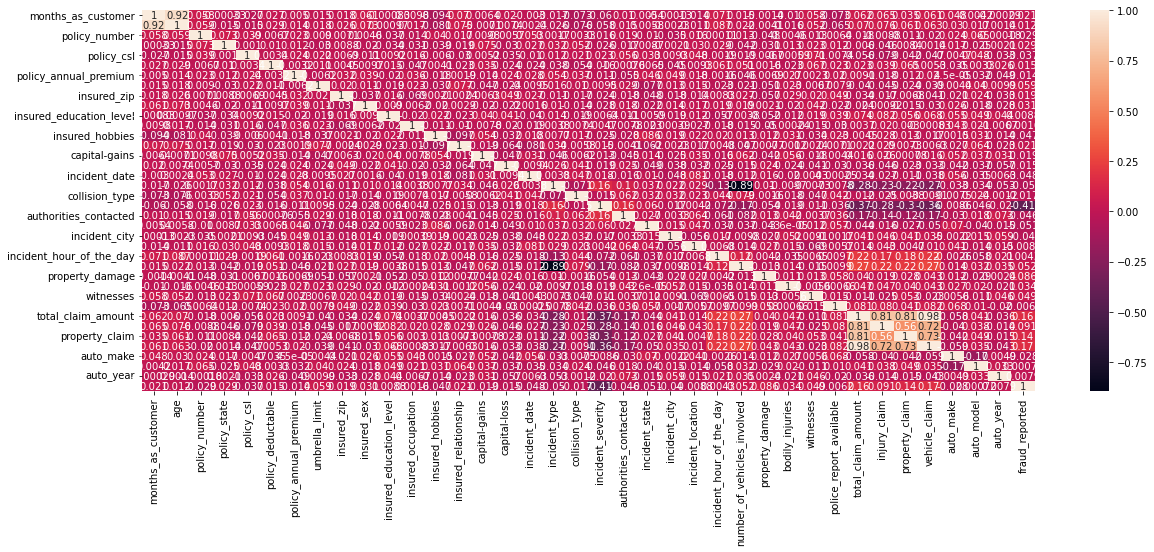

In [114]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

From the above plot, we can see that there is high correlation between incident_hour_of_the_day and number_of_vehicles_involved.
Injury claim & property Claim are also highly corelated.
vehicle_claim and total claim amount are positively correalted with target.
incident_severity is most negatively corealated with target.
Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

We are dropping some columns which are not necessary

In [126]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df.drop(to_drop, inplace = True, axis = 1)

In [128]:
df.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [130]:
df.shape

(1000, 27)

Checking for Outliers

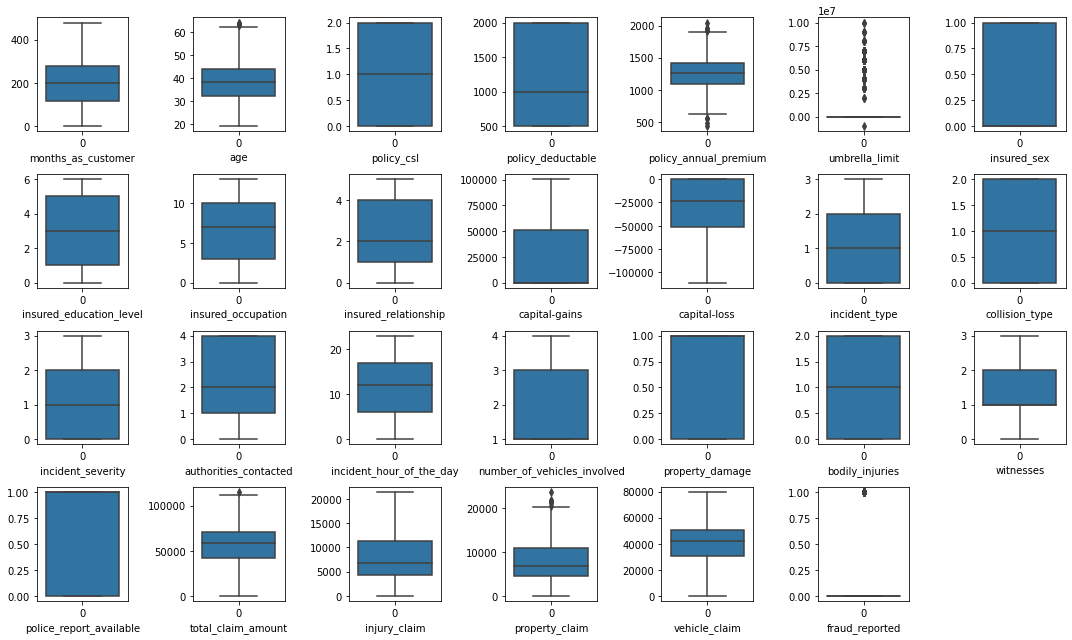

In [132]:
plt.figure(figsize=(15,9))#dimension only
graph = 1
for column in df:
    if graph<=27:
        plt.subplot(4,7,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.tight_layout()

Outliers are present in some numerical columns.

In [134]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.685977
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available       -0.662448
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169


DATA PREPROCESSING

In [137]:
#Removal of Duplicates and Unwanted Column
df.drop_duplicates(inplace=True)

In [138]:
df.shape

(1000, 27)

It appears there are no duplicates as there is no change in the number of rows.

Dropping of Features that strongly promotes multicollinearity(VIF)



To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
x=df.iloc[:,0:-1]
x.shape

(1000, 26)

In [141]:
y=df.iloc[:,-1]
y.shape

(1000,)

In [142]:
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_scaled

array([[ 1.07813958,  0.99083647,  0.06093665, ..., -0.18928317,
         1.16550497,  0.74965272],
       [ 0.2089946 ,  0.33407345,  0.06093665, ..., -1.36382194,
        -1.37269599, -1.82334593],
       [-0.60800168, -1.08891308, -1.18266843, ...,  0.05464372,
        -0.73607206, -0.78556451],
       ...,
       [-0.64276748, -0.54161057,  0.06093665, ...,  0.01364761,
         0.0208261 ,  0.77190224],
       [ 2.20802805,  2.52328351,  1.30454172, ..., -0.45370813,
        -0.45197603, -0.07357971],
       [ 2.19064515,  2.3043625 ,  0.06093665, ..., -1.42941572,
        -1.34366428, -1.81434017]])

In [143]:
x_scaled.shape

(1000, 26)

In [144]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
vif=pd.DataFrame()

In [146]:
vif['vif']=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

In [147]:
vif['Features'] = x.columns
vif

,vif,Features
0,6.797040,months_as_customer
1,6.818380,age
2,1.020378,policy_csl
3,1.030147,policy_deductable
4,1.020692,policy_annual_premium
5,1.017678,umbrella_limit
6,1.020295,insured_sex
7,1.025806,insured_education_level
8,1.011824,insured_occupation
9,1.024148,insured_relationship


We will drop total_claim_amount column as its a combination of injury_claim,property_claim
 and vehicle_claim

In [149]:

df.drop('total_claim_amount', inplace = True, axis = 1)


In [150]:
df.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported'],
      dtype='object')

Checking out for Outliers using Zscore

In [152]:
import scipy.stats
from scipy.stats import zscore

In [153]:
z=np.abs(zscore(df))
z

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,1.078140,0.990836,0.060937,0.222383,0.616705,0.479476,1.076953,0.530931,1.158316,1.437957,...,0.956261,0.823865,0.714545,0.009759,0.461838,0.722544,0.189283,1.165505,0.749653,1.746019
1,0.208995,0.334073,0.060937,1.412784,0.242521,1.697980,1.076953,0.530931,0.162558,0.247595,...,0.524475,0.823865,0.714545,1.210174,1.338700,0.722544,1.363822,1.372696,1.823346,1.746019
2,0.608002,1.088913,1.182668,1.412784,0.642233,1.697980,0.928546,1.557877,1.082141,0.347586,...,0.668404,1.140056,1.399493,1.229693,1.362107,1.383999,0.054644,0.736072,0.785565,0.572731
3,0.452355,0.224613,0.060937,1.412784,0.652886,2.133471,0.928546,1.557877,1.407256,0.942766,...,0.956261,0.823865,0.714545,0.009759,0.461838,1.383999,0.224130,0.219722,0.677607,1.746019
4,0.208995,0.552994,1.304542,0.222383,1.341980,2.133471,1.076953,1.522961,1.082141,0.942766,...,1.202666,0.823865,1.399493,1.210174,0.438431,1.383999,1.257232,1.399654,1.768252,0.572731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.304542,0.222383,0.222884,0.479476,0.928546,1.044404,1.158316,0.942766,...,1.202666,0.823865,0.714545,1.210174,0.438431,0.722544,2.051155,0.273817,1.224309,0.572731
996,0.704407,0.224613,1.182668,0.222383,0.739141,0.479476,0.928546,1.557877,0.584261,1.537947,...,1.634452,0.823865,0.714545,1.229693,1.362107,0.722544,2.182342,2.214794,1.821868,0.572731
997,0.642767,0.541611,0.060937,1.039966,0.520739,0.826998,0.928546,1.044404,1.407256,0.247595,...,1.100189,1.140056,0.714545,1.229693,1.362107,0.722544,0.013648,0.020826,0.771902,0.572731
998,2.208028,2.523284,1.304542,1.412784,0.411866,1.697980,1.076953,1.522961,0.411497,1.537947,...,1.388046,0.823865,0.714545,1.210174,0.438431,0.722544,0.453708,0.451976,0.073580,0.572731


In [199]:
#checking datashape of z
z.shape

(1000, 26)

In [200]:
threshold =3
np.where(z>3)
len(np.where(z>3)[0])

20

In [201]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]

#old Dataset
print("Old DataFrame",df.shape)
#Dataset after removal of outliers
print("New DataFrame",df_new.shape)
# total rows deleted
print("total_dropped_rows",df.shape[0]-df_new.shape[0])

Old DataFrame (1000, 26)
New DataFrame (980, 26)
total_dropped_rows 20


In [202]:
#dataset after removignoutliers
df_new

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1.0,1000,1406.91,0,1.0,4.0,2.0,0.0,...,5,1,1.0,1,2,1.0,6510,13020,52080,1
1,228,42,1.0,2000,1197.22,5000000,1.0,4.0,6.0,2.0,...,8,1,1.0,0,0,1.0,780,780,3510,1
2,134,29,0.0,2000,1413.14,5000000,0.0,6.0,11.0,3.0,...,7,3,0.0,2,3,0.0,7700,3850,23100,0
3,256,41,1.0,2000,1415.74,6000000,0.0,6.0,1.0,4.0,...,5,1,1.0,1,2,0.0,6340,6340,50720,1
4,228,44,2.0,1000,1583.91,6000000,1.0,0.0,11.0,4.0,...,20,1,0.0,0,1,0.0,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,1000,1310.80,0,0.0,5.0,2.0,4.0,...,20,1,1.0,0,1,1.0,17440,8720,61040,0
996,285,41,0.0,1000,1436.79,0,0.0,6.0,9.0,5.0,...,23,1,1.0,2,3,1.0,18080,18080,72320,0
997,130,34,1.0,500,1383.49,3000000,0.0,5.0,1.0,2.0,...,4,3,1.0,2,3,1.0,7500,7500,52500,0
998,458,62,2.0,2000,1356.92,5000000,1.0,0.0,5.0,5.0,...,2,1,1.0,0,1,1.0,5220,5220,36540,0


In [203]:
#Lets reset our data having removed outliers
df_new.reset_index(inplace=True)
df_new

,index,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,0,328,48,1.0,1000,1406.91,0,1.0,4.0,2.0,...,5,1,1.0,1,2,1.0,6510,13020,52080,1
1,1,228,42,1.0,2000,1197.22,5000000,1.0,4.0,6.0,...,8,1,1.0,0,0,1.0,780,780,3510,1
2,2,134,29,0.0,2000,1413.14,5000000,0.0,6.0,11.0,...,7,3,0.0,2,3,0.0,7700,3850,23100,0
3,3,256,41,1.0,2000,1415.74,6000000,0.0,6.0,1.0,...,5,1,1.0,1,2,0.0,6340,6340,50720,1
4,4,228,44,2.0,1000,1583.91,6000000,1.0,0.0,11.0,...,20,1,0.0,0,1,0.0,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,995,3,38,2.0,1000,1310.80,0,0.0,5.0,2.0,...,20,1,1.0,0,1,1.0,17440,8720,61040,0
976,996,285,41,0.0,1000,1436.79,0,0.0,6.0,9.0,...,23,1,1.0,2,3,1.0,18080,18080,72320,0
977,997,130,34,1.0,500,1383.49,3000000,0.0,5.0,1.0,...,4,3,1.0,2,3,1.0,7500,7500,52500,0
978,998,458,62,2.0,2000,1356.92,5000000,1.0,0.0,5.0,...,2,1,1.0,0,1,1.0,5220,5220,36540,0


In [204]:
#dropping the index columns which is not needed
df_new.drop('index', axis=1,inplace=True)
df_new

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1.0,1000,1406.91,0,1.0,4.0,2.0,0.0,...,5,1,1.0,1,2,1.0,6510,13020,52080,1
1,228,42,1.0,2000,1197.22,5000000,1.0,4.0,6.0,2.0,...,8,1,1.0,0,0,1.0,780,780,3510,1
2,134,29,0.0,2000,1413.14,5000000,0.0,6.0,11.0,3.0,...,7,3,0.0,2,3,0.0,7700,3850,23100,0
3,256,41,1.0,2000,1415.74,6000000,0.0,6.0,1.0,4.0,...,5,1,1.0,1,2,0.0,6340,6340,50720,1
4,228,44,2.0,1000,1583.91,6000000,1.0,0.0,11.0,4.0,...,20,1,0.0,0,1,0.0,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,3,38,2.0,1000,1310.80,0,0.0,5.0,2.0,4.0,...,20,1,1.0,0,1,1.0,17440,8720,61040,0
976,285,41,0.0,1000,1436.79,0,0.0,6.0,9.0,5.0,...,23,1,1.0,2,3,1.0,18080,18080,72320,0
977,130,34,1.0,500,1383.49,3000000,0.0,5.0,1.0,2.0,...,4,3,1.0,2,3,1.0,7500,7500,52500,0
978,458,62,2.0,2000,1356.92,5000000,1.0,0.0,5.0,5.0,...,2,1,1.0,0,1,1.0,5220,5220,36540,0


In [205]:
df_new.skew()

months_as_customer             0.362608
age                            0.475385
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage               -0.691993
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available       -0.653602
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936


In [206]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'

#from sklearn.preprocessing import PowerTransformer
#scaler = PowerTransformer(method ='yeo-johnson')


In [207]:
#extracting the columns that are skewed
#data=['umbrella_limit','police_report_available','property_damage','vehicle_claim']

In [208]:

#df_new[data] = scaler.fit_transform(df_new[data].values)

In [209]:
#df_new.skew()

In [221]:
df_new['fraud_reported'].value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

The datset is imbalanced. We can use Smote technique to balance

In [222]:
from imblearn.over_sampling import SMOTE

In [223]:
smt=SMOTE()

In [224]:
#x,y are the inputs inside smote to create artificial rows
#trainx & trainy are givng the new rows
trainx,trainy=smt.fit_resample(x,y)

In [225]:
trainy.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Splitting the data for Model Building

In [227]:
x=df.iloc[:,0:-1]
x.shape

(1000, 25)

In [228]:
x.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [212]:
y=df.iloc[:,-1]

In [217]:
y.shape

(1000,)

Suport Vector Classifier

In [229]:
svc = SVC()


In [230]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.20)

In [234]:
svc.fit(x_train, y_train)



SVC()

In [238]:
svc.score(x_train,y_train)

0.5373754152823921

In [240]:
pred_test=svc.predict(x_test)

In [241]:
pred_test

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [242]:
svc_acc=round(accuracy_score(y_test,pred_test),2)
svc_acc

0.49

In [243]:
confusion_matrix(y_test,pred_test)

array([[112,  30],
       [124,  36]], dtype=int64)

In [244]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.47      0.79      0.59       142
           1       0.55      0.23      0.32       160

    accuracy                           0.49       302
   macro avg       0.51      0.51      0.46       302
weighted avg       0.51      0.49      0.45       302



Checking overfitting or underfitting 

In [245]:
from sklearn.model_selection import cross_val_score

In [246]:
scr=cross_val_score(svc,x,y,cv=5)
print(scr)
svc_cv_scr=round(scr.mean(),2)
print(round(scr.std()),2)
print("The cv score for SVC Classifier:",svc_cv_scr)

[0.75  0.75  0.755 0.755 0.755]
0 2
The cv score for SVC Classifier: 0.75


Decision Tree Classifier

In [251]:
from sklearn.tree import DecisionTreeClassifier

In [252]:
dtc=DecisionTreeClassifier()

In [253]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [254]:
pred_y=dtc.predict(x_test)

In [255]:
pred_y

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [256]:
acc_dtc=round(accuracy_score(y_test,pred_y))

In [257]:
acc_dtc

1

In [271]:
cf=confusion_matrix(y_test,pred_y)
cf

array([[123,  19],
       [ 18, 142]], dtype=int64)

In [270]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       142
           1       0.88      0.89      0.88       160

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302



<AxesSubplot:>

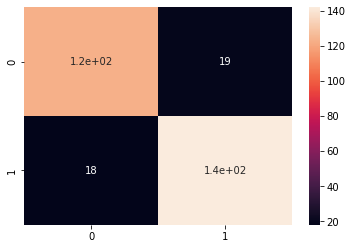

In [272]:

sns.heatmap(cf,annot=True)

Checking overfitting or underfitting

In [260]:
scr=cross_val_score(dtc,x,y,cv=5)
print(scr)
dtc_cv_scr=round(scr.mean(),2)
print(round(scr.std(),2))
print('The Cv score of Decision Tree Classifier',dtc_cv_scr)

[0.73  0.71  0.73  0.725 0.745]
0.01
The Cv score of Decision Tree Classifier 0.73


Random Forest Classifier

In [262]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
rf=RandomForestClassifier()

In [264]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [265]:
pred_y=rf.predict(x_test)

In [266]:
pred_y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,

In [274]:
acc_rf=round(accuracy_score(y_test,pred_y),2)

In [275]:
acc_rf

0.88

In [276]:
cf=confusion_matrix(y_test,pred_y)
cf

array([[123,  19],
       [ 18, 142]], dtype=int64)

<AxesSubplot:>

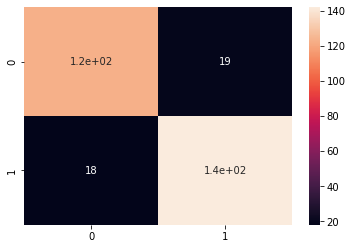

In [277]:
sns.heatmap(cf,annot=True)

In [278]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       142
           1       0.88      0.89      0.88       160

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302



Checking overfitting or underfitting

In [280]:
scr=cross_val_score(rf,x,y,cv=5)
print(scr)
rf_cv_scr=(scr.mean())
print(round(scr.std()),2)
print('The Cross Validation Score of Random Forest Classifier',rf_cv_scr)

[0.78  0.76  0.75  0.795 0.825]
0 2
The Cross Validation Score of Random Forest Classifier 0.782


KNN Classifier

In [282]:
from sklearn.neighbors import KNeighborsClassifier

In [283]:
knn= KNeighborsClassifier()

In [284]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [285]:
pred_x=knn.predict(x_test)
pred_x

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [286]:
knn_acc=round(accuracy_score(y_test,pred_x))

In [287]:
knn_acc

1

In [288]:
cf=confusion_matrix(y_test,pred_x)
cf

array([[ 83,  59],
       [ 38, 122]], dtype=int64)

<AxesSubplot:>

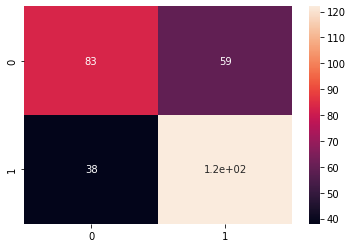

In [290]:
sns.heatmap(cf,annot=True)

In [289]:
print(classification_report(y_test,pred_x))

              precision    recall  f1-score   support

           0       0.69      0.58      0.63       142
           1       0.67      0.76      0.72       160

    accuracy                           0.68       302
   macro avg       0.68      0.67      0.67       302
weighted avg       0.68      0.68      0.68       302



Checking overfitting or underfitting

In [295]:
scr=cross_val_score(knn,x,y,cv=5)
print(scr)
knn_cv_scr=round(scr.mean(),2)
print(round(scr.std(),2))
print("The Cross validation score for KNN is", knn_cv_scr)


[0.745 0.685 0.67  0.675 0.695]
0.03
The Cross validation score for KNN is 0.69


Ada Boost Classifier

In [297]:
from sklearn.ensemble import AdaBoostClassifier

In [298]:
ad=AdaBoostClassifier()

In [299]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [301]:
pred_x=ad.predict(x_test)
pred_x

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,

In [307]:
ad_acc=round(accuracy_score(y_test,pred_x),2)

In [308]:
ad_acc

0.83

In [309]:
cf=confusion_matrix(y_test,pred_x)
cf

array([[119,  23],
       [ 28, 132]], dtype=int64)

<AxesSubplot:>

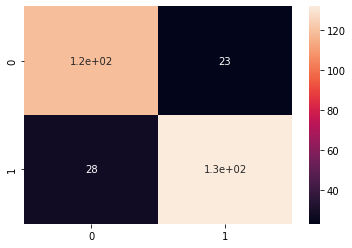

In [310]:
sns.heatmap(cf,annot=True)

In [312]:
print(classification_report(y_test,pred_x))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       142
           1       0.85      0.82      0.84       160

    accuracy                           0.83       302
   macro avg       0.83      0.83      0.83       302
weighted avg       0.83      0.83      0.83       302



Checking overfitting or underfitting

In [313]:
scr=cross_val_score(ad,x,y,cv=5)
print(scr)
ad_cv_scr=round(scr.mean(),2)
print(round(scr.std(),2))
print('The cross validation Score of', ad_cv_scr)

[0.79  0.76  0.745 0.785 0.795]
0.02
The cross validation Score of 0.78


In [314]:
#Constructing a dataframe...
models = pd.DataFrame({'ML_Model' : ['SVC','Decision Tree Classifier','Random Forest Classifier','KNN Classifier','Ada Boost Classifier'],'Accuracy_Score' : [svc_acc,acc_dtc,acc_rf,knn_acc,ad_acc],'Cross_Validation_Score':[svc_cv_scr,dtc_cv_scr,rf_cv_scr,knn_cv_scr,ad_cv_scr]})
models

,ML_Model,Accuracy_Score,Cross_Validation_Score
0,SVC,0.49,0.750
1,Decision Tree Classifier,1.00,0.730
2,Random Forest Classifier,0.88,0.782
3,KNN Classifier,1.00,0.690
4,Ada Boost Classifier,0.83,0.780


We will select 	Random Forest Classifier as the best model because it has the highest Accuracy score & cross validation score

Hyper Parameter tunning

In [315]:
from sklearn.model_selection import GridSearchCV

In [316]:
rf=RandomForestClassifier()

In [317]:
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
            'criterion' :['gini', 'entropy'],
            'n_estimators':[100,200]}

In [318]:
GSV=GridSearchCV(rf,parameters,cv=5)

In [319]:
GSV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [320]:
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [321]:
GSV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='auto')

In [322]:
GCV_pred=GSV.best_estimator_.predict(x_test)#predicting with the best parameter
accuracy_score(y_test,GCV_pred)#checking final accuracy

0.8741721854304636

ROC AUC plot

In [323]:
from sklearn.metrics import plot_roc_curve

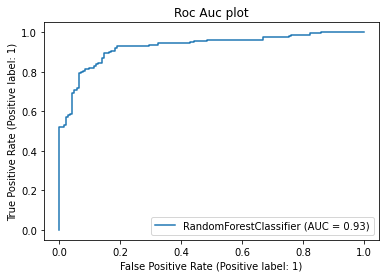

In [324]:
plot_roc_curve(GSV.best_estimator_,x_test,y_test)
plt.title("Roc Auc plot")
plt.show()

Model Saving

In [328]:
import pickle

In [329]:
filename= 'ML_Fraud_Claims'

In [331]:
pickle.dump(rf,open(filename,'wb'))